CUSTOMER PURCHASE PREDICTION - COMPETITION SOLUTION

 Dataset Shape: (1500, 9)
 Columns: ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB
None

 First 5 rows:
   Age  Gender   AnnualIn

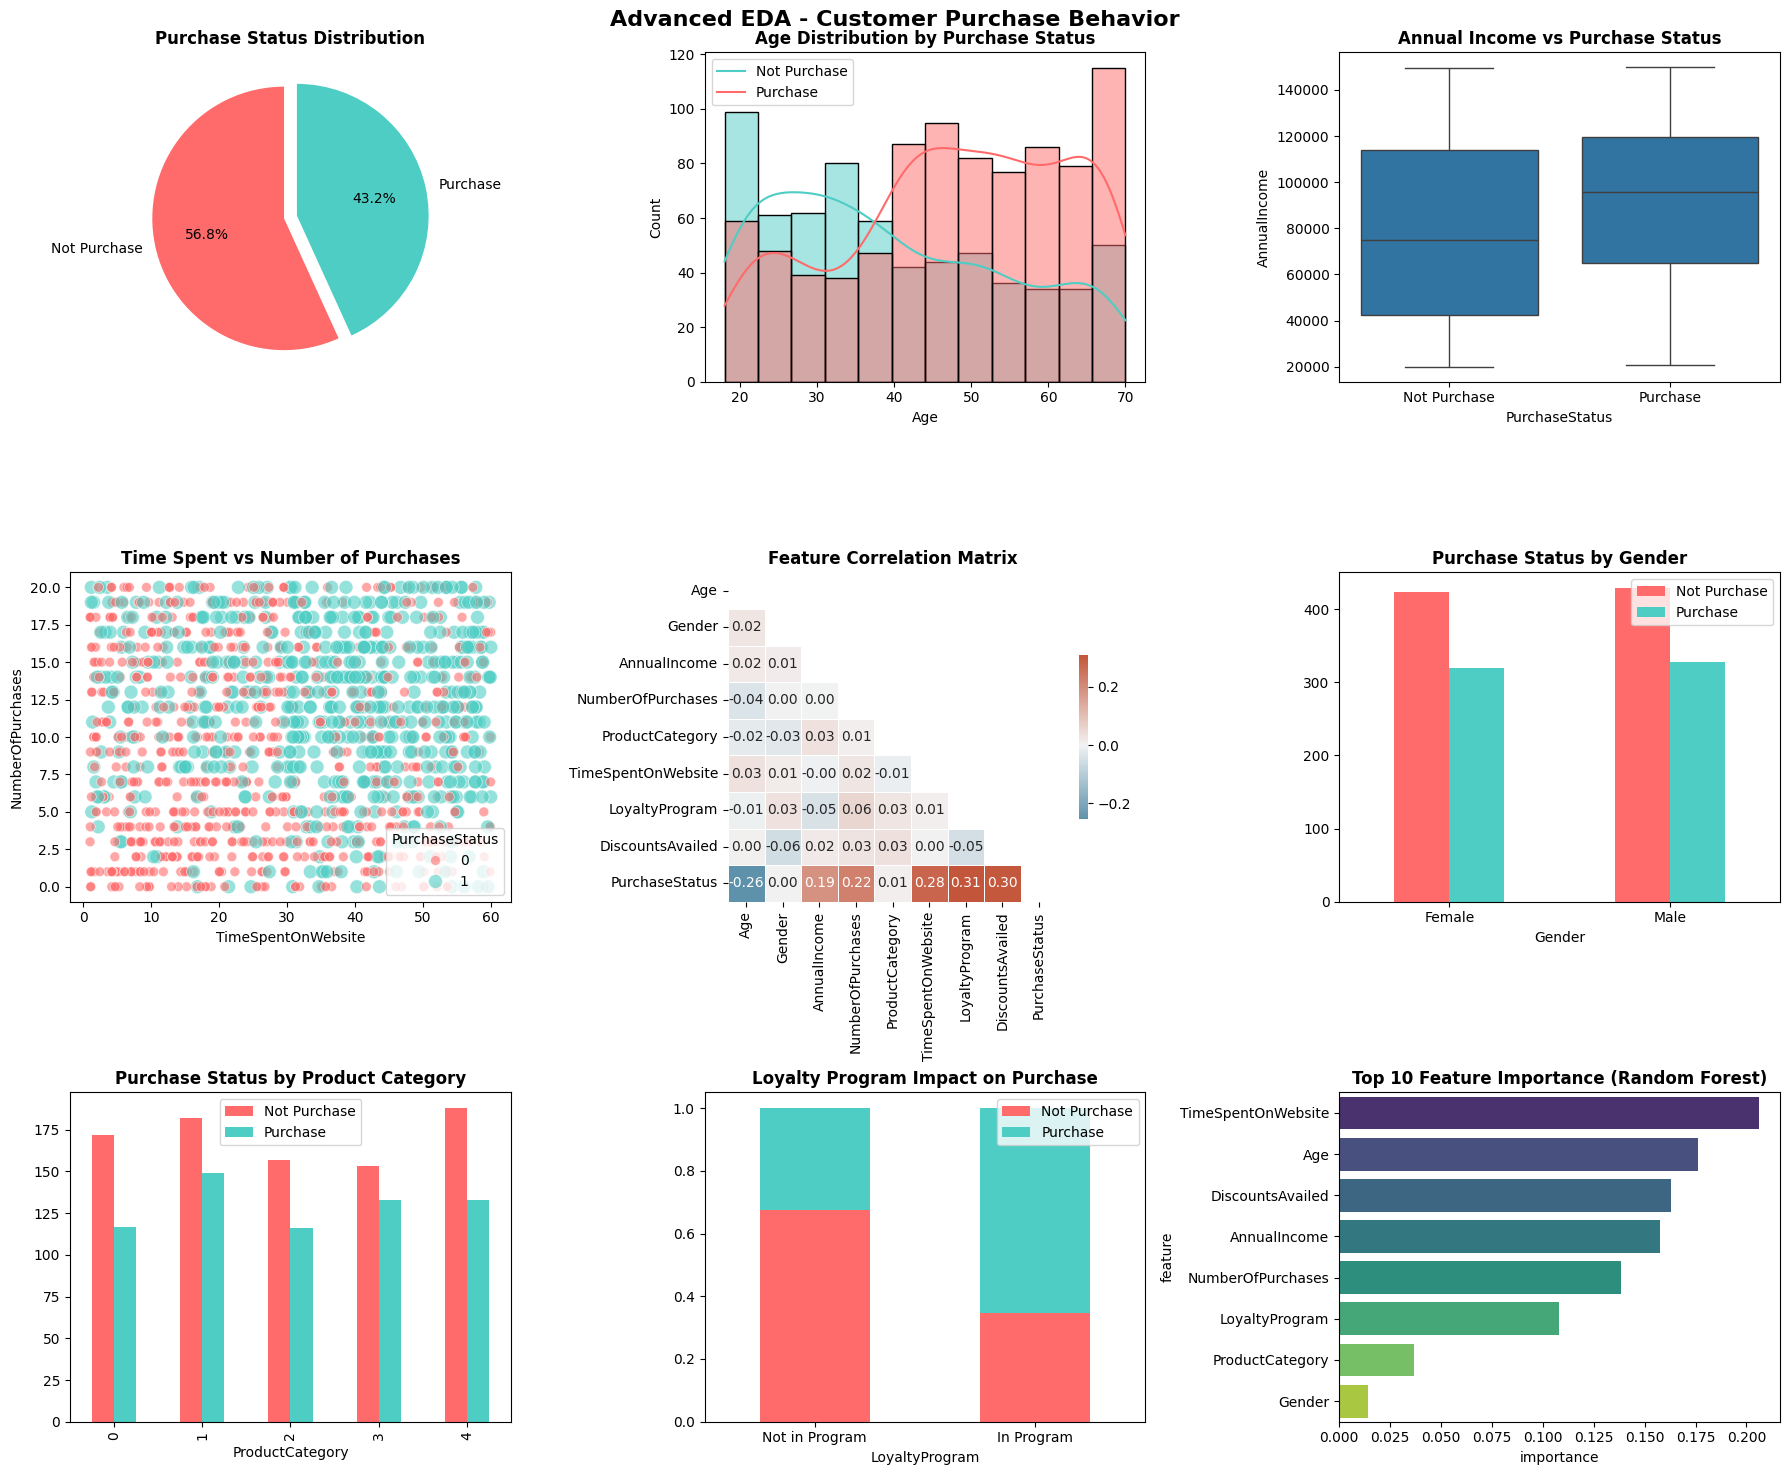


KEY INSIGHTS FROM EDA:
 Overall Purchase Rate: 43.20%

 Purchase Rate by Gender:
   Female (0): 43.07%
   Male (1): 43.33%

 High Income (>75th percentile) Purchase Rate: 47.33%

 Purchase Rate by Loyalty Program:
   Not in Program (0): 32.48%
   In Program (1): 65.31%

FEATURE ENGINEERING

🔧 Creating Interaction Features...
 Creating Age Groups...
 Creating Income Segments...
 Creating Behavioral Features...
 Creating Time-based Features...
🔧 Creating Polynomial Features...
🔧 Creating Composite Score...
 Original features: 9
 Engineered features: 24
 Total features after engineering: 24

DATA PREPROCESSING

 Numeric Features (20): ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed', 'Income_Per_Purchase', 'Time_Per_Purchase', 'Spending_Efficiency', 'Purchase_Frequency', 'Discount_Usage_Rate', 'AnnualIncome_sq', 'TimeSpent_sq', 'Age_sq', 'AnnualIncome_norm', 'NumberOfPurchases_norm', 'TimeSpentOnWebsite_n

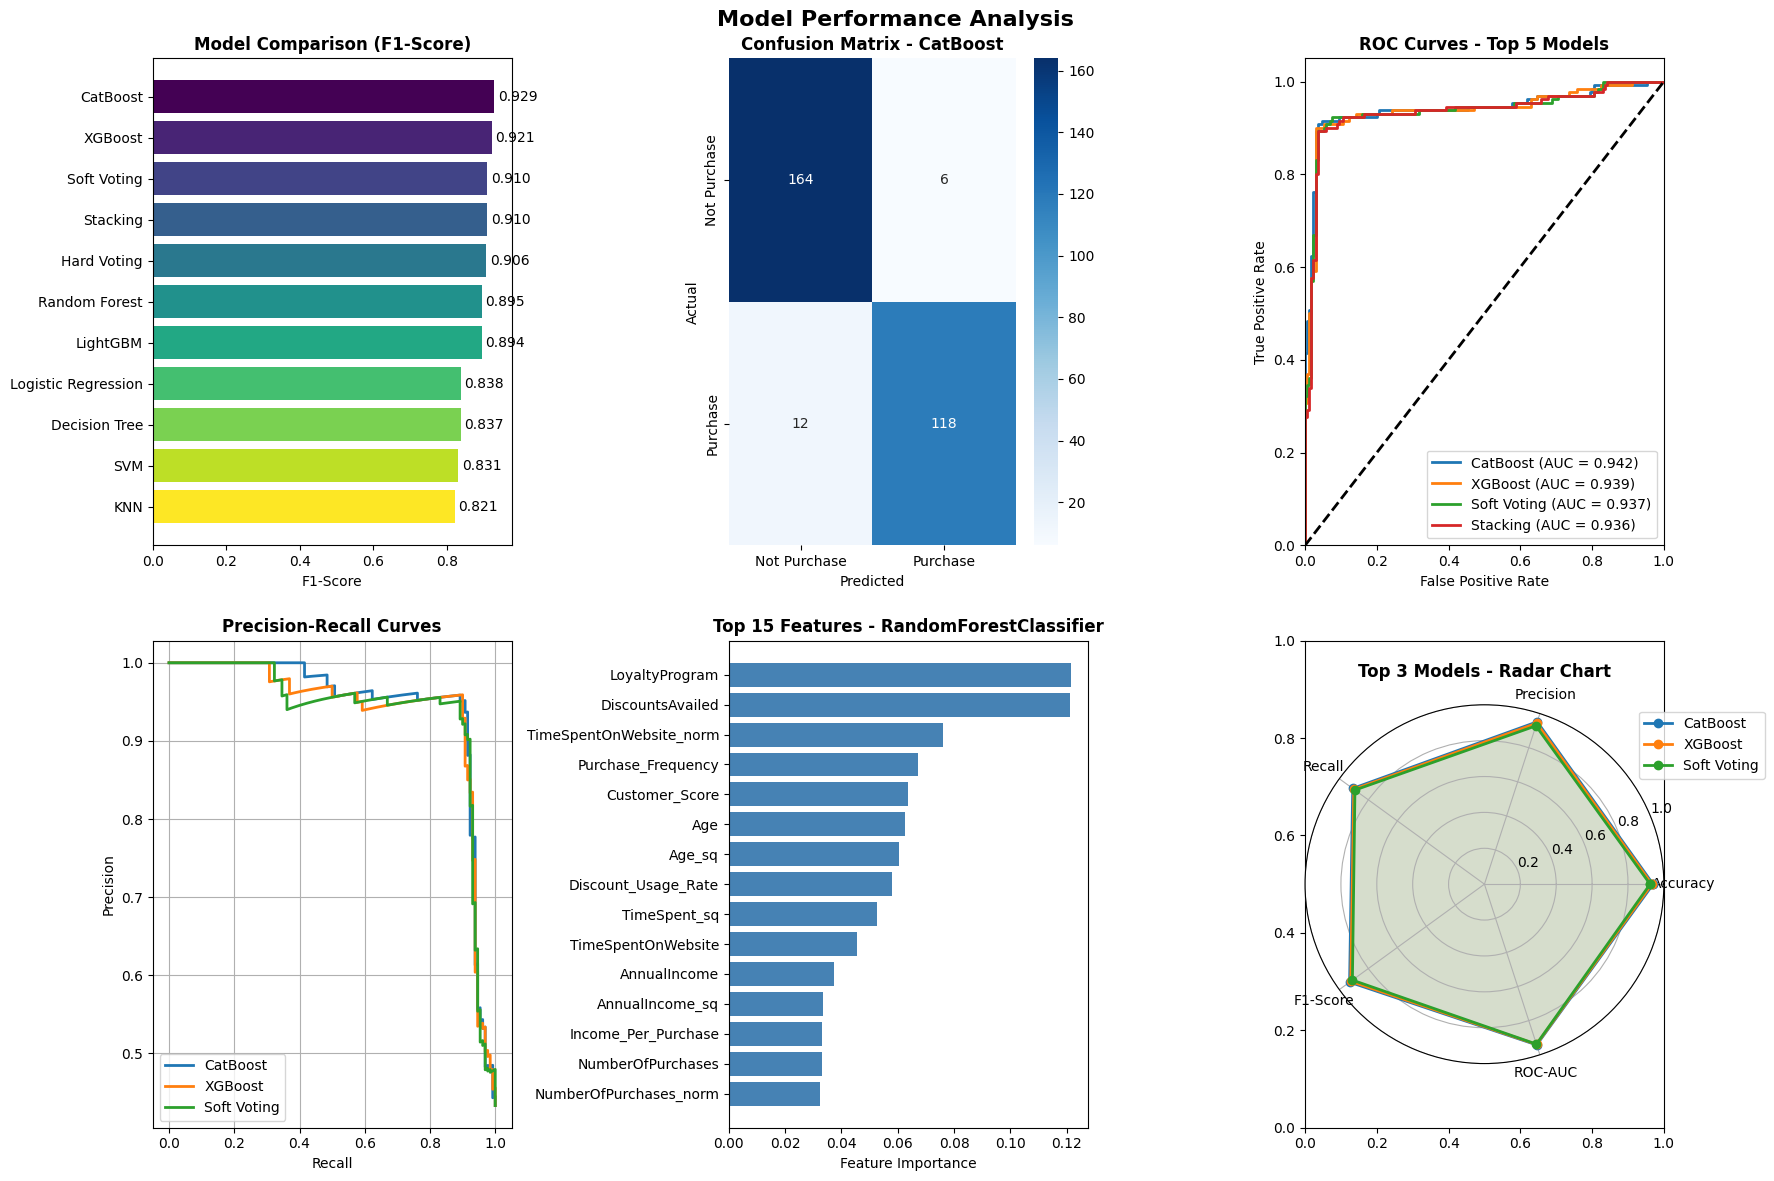


BUSINESS INSIGHTS & RECOMMENDATIONS

 TOP 10 MOST IMPORTANT FEATURES FOR PREDICTION:
   DiscountsAvailed: 18.1645
   LoyaltyProgram: 14.3279
   Age: 7.7723
   Age_sq: 6.9608
   TimeSpentOnWebsite_norm: 6.3306
   TimeSpent_sq: 6.1788
   TimeSpentOnWebsite: 5.5018
   NumberOfPurchases: 4.8151
   NumberOfPurchases_norm: 3.6825
   AnnualIncome_norm: 3.5939

 PREDICTION ANALYSIS:
   Total Test Samples: 300
   Correct Predictions: 282
   Incorrect Predictions: 18
   Overall Accuracy: 94.00%

  ERROR ANALYSIS:
   False Positives (Type I Error): 6 (2.00%)
   False Negatives (Type II Error): 12 (4.00%)

 BUSINESS RECOMMENDATIONS:
1. Focus on High-Value Customers: Target customers with high AnnualIncome
   and frequent purchase history.
2. Improve Loyalty Program: Enhance benefits for loyal customers to
   increase purchase probability.
3. Personalize Marketing: Use prediction probabilities to segment
   customers and personalize offers.
4. Optimize Website Experience: Increase time spent on we

In [5]:
# ============================================
# CUSTOMER PURCHASE PREDICTION - COMPETITION WINNING SOLUTION
# ============================================

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve)

# Utilities
import joblib
from datetime import datetime
import json

# Set random seeds for reproducibility
np.random.seed(42)

# ============================================
# 1. DATA LOADING & EXPLORATION
# ============================================

print("=" * 60)
print("CUSTOMER PURCHASE PREDICTION - COMPETITION SOLUTION")
print("=" * 60)

# Load the dataset
df = pd.read_csv('customer_purchase_data.csv')

print(f"\n Dataset Shape: {df.shape}")
print(f" Columns: {list(df.columns)}")

# Display basic info
print("\n Dataset Info:")
print(df.info())

# Display first few rows
print("\n First 5 rows:")
print(df.head())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\n Descriptive Statistics:")
print(df.describe().T)

# ============================================
# 2. ADVANCED EDA WITH VISUALIZATIONS
# ============================================

def advanced_eda(df):
    """Perform comprehensive exploratory data analysis"""
    
    # Create subplots
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('Advanced EDA - Customer Purchase Behavior', fontsize=16, fontweight='bold')
    
    # 1. Target Distribution
    ax1 = axes[0, 0]
    purchase_counts = df['PurchaseStatus'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4']
    ax1.pie(purchase_counts, labels=['Not Purchase', 'Purchase'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0.05))
    ax1.set_title('Purchase Status Distribution', fontweight='bold')
    
    # 2. Age Distribution
    ax2 = axes[0, 1]
    sns.histplot(data=df, x='Age', hue='PurchaseStatus', kde=True,
                 palette={0: '#FF6B6B', 1: '#4ECDC4'}, ax=ax2)
    ax2.set_title('Age Distribution by Purchase Status', fontweight='bold')
    ax2.legend(['Not Purchase', 'Purchase'])
    
    # 3. Income vs Purchase
    ax3 = axes[0, 2]
    sns.boxplot(data=df, x='PurchaseStatus', y='AnnualIncome', ax=ax3)
    ax3.set_title('Annual Income vs Purchase Status', fontweight='bold')
    ax3.set_xticklabels(['Not Purchase', 'Purchase'])
    
    # 4. Time Spent vs Purchase
    ax4 = axes[1, 0]
    sns.scatterplot(data=df, x='TimeSpentOnWebsite', y='NumberOfPurchases',
                    hue='PurchaseStatus', palette={0: '#FF6B6B', 1: '#4ECDC4'},
                    size='PurchaseStatus', sizes=[50, 100], alpha=0.6, ax=ax4)
    ax4.set_title('Time Spent vs Number of Purchases', fontweight='bold')
    
    # 5. Correlation Heatmap
    ax5 = axes[1, 1]
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt=".2f", ax=ax5)
    ax5.set_title('Feature Correlation Matrix', fontweight='bold')
    
    # 6. Gender Distribution
    ax6 = axes[1, 2]
    gender_purchase = pd.crosstab(df['Gender'], df['PurchaseStatus'])
    gender_purchase.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=ax6)
    ax6.set_title('Purchase Status by Gender', fontweight='bold')
    ax6.set_xticklabels(['Female', 'Male'], rotation=0)
    ax6.legend(['Not Purchase', 'Purchase'])
    
    # 7. Product Category Analysis
    ax7 = axes[2, 0]
    category_purchase = pd.crosstab(df['ProductCategory'], df['PurchaseStatus'])
    category_purchase.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=ax7)
    ax7.set_title('Purchase Status by Product Category', fontweight='bold')
    ax7.legend(['Not Purchase', 'Purchase'])
    
    # 8. Loyalty Program Impact
    ax8 = axes[2, 1]
    loyalty_purchase = pd.crosstab(df['LoyaltyProgram'], df['PurchaseStatus'], normalize='index')
    loyalty_purchase.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], ax=ax8)
    ax8.set_title('Loyalty Program Impact on Purchase', fontweight='bold')
    ax8.set_xticklabels(['Not in Program', 'In Program'], rotation=0)
    ax8.legend(['Not Purchase', 'Purchase'], loc='upper right')
    
    # 9. Feature Importance (Initial)
    ax9 = axes[2, 2]
    from sklearn.ensemble import RandomForestClassifier
    X_temp = df.drop('PurchaseStatus', axis=1)
    y_temp = df['PurchaseStatus']
    
    # Handle categorical features
    X_temp = pd.get_dummies(X_temp, drop_first=True)
    
    rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_temp.fit(X_temp, y_temp)
    
    feature_importance = pd.DataFrame({
        'feature': X_temp.columns,
        'importance': rf_temp.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis', ax=ax9)
    ax9.set_title('Top 10 Feature Importance (Random Forest)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print("\n" + "="*60)
    print("KEY INSIGHTS FROM EDA:")
    print("="*60)
    
    # Purchase rate
    purchase_rate = df['PurchaseStatus'].mean() * 100
    print(f" Overall Purchase Rate: {purchase_rate:.2f}%")
    
    # Gender analysis
    gender_purchase_rate = df.groupby('Gender')['PurchaseStatus'].mean() * 100
    print(f"\n Purchase Rate by Gender:")
    print(f"   Female (0): {gender_purchase_rate[0]:.2f}%")
    print(f"   Male (1): {gender_purchase_rate[1]:.2f}%")
    
    # Income analysis
    high_income_threshold = df['AnnualIncome'].quantile(0.75)
    high_income_purchase = df[df['AnnualIncome'] > high_income_threshold]['PurchaseStatus'].mean() * 100
    print(f"\n High Income (>75th percentile) Purchase Rate: {high_income_purchase:.2f}%")
    
    # Loyalty program analysis
    loyalty_purchase_rate = df.groupby('LoyaltyProgram')['PurchaseStatus'].mean() * 100
    print(f"\n Purchase Rate by Loyalty Program:")
    print(f"   Not in Program (0): {loyalty_purchase_rate[0]:.2f}%")
    print(f"   In Program (1): {loyalty_purchase_rate[1]:.2f}%")

# Run EDA
advanced_eda(df)

# ============================================
# 3. ADVANCED FEATURE ENGINEERING
# ============================================

print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Create a copy for feature engineering
df_engineered = df.copy()

# 1. Create interaction features
print("\n🔧 Creating Interaction Features...")
df_engineered['Income_Per_Purchase'] = df_engineered['AnnualIncome'] / (df_engineered['NumberOfPurchases'] + 1)
df_engineered['Time_Per_Purchase'] = df_engineered['TimeSpentOnWebsite'] / (df_engineered['NumberOfPurchases'] + 1)
df_engineered['Spending_Efficiency'] = df_engineered['NumberOfPurchases'] / (df_engineered['TimeSpentOnWebsite'] + 1)

# 2. Create age groups
print(" Creating Age Groups...")
df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], 
                                   bins=[0, 25, 35, 50, 65, 100],
                                   labels=['Youth', 'Young_Adult', 'Middle_Aged', 'Senior', 'Elderly'])

# 3. Create income segments
print(" Creating Income Segments...")
income_quantiles = df_engineered['AnnualIncome'].quantile([0.25, 0.5, 0.75]).values
df_engineered['Income_Segment'] = pd.cut(df_engineered['AnnualIncome'],
                                        bins=[0, income_quantiles[0], income_quantiles[1], 
                                              income_quantiles[2], np.inf],
                                        labels=['Low', 'Medium', 'High', 'Very_High'])

# 4. Create behavioral features
print(" Creating Behavioral Features...")
df_engineered['Purchase_Frequency'] = df_engineered['NumberOfPurchases'] / (df_engineered['Age'] - 18 + 1)
df_engineered['Discount_Usage_Rate'] = df_engineered['DiscountsAvailed'] / (df_engineered['NumberOfPurchases'] + 1)

# 5. Create time-based features
print(" Creating Time-based Features...")
df_engineered['Time_Spent_Category'] = pd.qcut(df_engineered['TimeSpentOnWebsite'], 
                                              q=4, 
                                              labels=['Low_Time', 'Medium_Time', 'High_Time', 'Very_High_Time'])

# 6. Polynomial features for key variables
print("🔧 Creating Polynomial Features...")
df_engineered['AnnualIncome_sq'] = df_engineered['AnnualIncome'] ** 2
df_engineered['TimeSpent_sq'] = df_engineered['TimeSpentOnWebsite'] ** 2
df_engineered['Age_sq'] = df_engineered['Age'] ** 2

# 7. Create composite score
print("🔧 Creating Composite Score...")
# Normalize features for composite score
scaler_temp = MinMaxScaler()
features_for_score = ['AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite']
df_engineered[[col + '_norm' for col in features_for_score]] = scaler_temp.fit_transform(df_engineered[features_for_score])

# Create weighted composite score
weights = {'AnnualIncome_norm': 0.4, 'NumberOfPurchases_norm': 0.3, 'TimeSpentOnWebsite_norm': 0.3}
df_engineered['Customer_Score'] = sum(df_engineered[col] * weight for col, weight in weights.items())

print(f" Original features: {len(df.columns)}")
print(f" Engineered features: {len(df_engineered.columns)}")
print(f" Total features after engineering: {len(df_engineered.columns)}")

# ============================================
# 4. ADVANCED DATA PREPROCESSING
# ============================================

print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Separate features and target
X = df_engineered.drop('PurchaseStatus', axis=1)
y = df_engineered['PurchaseStatus']

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n Numeric Features ({len(numeric_features)}): {numeric_features}")
print(f" Categorical Features ({len(categorical_features)}): {categorical_features}")

# Check for outliers using IQR method
print("\n Checking for outliers...")
for col in numeric_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((X[col] < lower_bound) | (X[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"   {col}: {outliers} outliers detected ({outliers/len(X)*100:.2f}%)")

# Handle outliers using winsorization (capping)
print("\n🔧 Handling outliers with winsorization...")
for col in numeric_features:
    lower_limit = X[col].quantile(0.01)
    upper_limit = X[col].quantile(0.99)
    X[col] = np.clip(X[col], lower_limit, upper_limit)

# Create preprocessing pipelines
print("\n🔧 Creating preprocessing pipelines...")
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  # RobustScaler is less sensitive to outliers
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data before preprocessing to avoid data leakage
print("\n📊 Splitting data (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   Purchase rate in train: {y_train.mean():.2%}")
print(f"   Purchase rate in test: {y_test.mean():.2%}")

# ============================================
# 5. FEATURE SELECTION
# ============================================

print("\n" + "="*60)
print("FEATURE SELECTION")
print("="*60)

# First, preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after preprocessing
# Extract feature names from preprocessor
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(cols)
    elif name == 'cat':
        # Get one-hot encoded feature names
        ohe = transformer.named_steps['onehot']
        ohe_feature_names = ohe.get_feature_names_out(cols)
        feature_names.extend(ohe_feature_names)

print(f"\n Total features after preprocessing: {len(feature_names)}")

# Method 1: SelectKBest with ANOVA F-value
print("\n Performing SelectKBest feature selection...")
selector_kbest = SelectKBest(score_func=f_classif, k='all')
selector_kbest.fit(X_train_preprocessed, y_train)

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': selector_kbest.scores_
}).sort_values('Score', ascending=False)

print("\n Top 15 Most Important Features (SelectKBest):")
print(feature_importance_df.head(15).to_string(index=False))

# Method 2: Recursive Feature Elimination with Cross-Validation
print("\n Performing RFECV feature selection...")
rfecv_selector = RFECV(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    step=10,  # Remove 10 features at a time
    cv=StratifiedKFold(5),
    scoring='accuracy',
    min_features_to_select=20,
    n_jobs=-1
)

rfecv_selector.fit(X_train_preprocessed, y_train)

print(f" Optimal number of features (RFECV): {rfecv_selector.n_features_}")
print(f" Features selected: {rfecv_selector.support_.sum()}")

# Select important features
important_features_indices = np.where(rfecv_selector.support_)[0]
X_train_selected = X_train_preprocessed[:, important_features_indices]
X_test_selected = X_test_preprocessed[:, important_features_indices]
selected_feature_names = [feature_names[i] for i in important_features_indices]

print(f"\n Final selected features: {len(selected_feature_names)}")

# ============================================
# 6. MODEL BUILDING WITH HYPERPARAMETER TUNING
# ============================================

print("\n" + "="*60)
print("MODEL BUILDING & HYPERPARAMETER TUNING")
print("="*60)

# Define base models
base_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced', verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_jobs=-1)
}

# Define hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, -1],
        'learning_rate': [0.01, 0.1, 0.3],
        'num_leaves': [31, 50, 100]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Store results
results = {}
best_models = {}

# Train and tune each model
print("\n🎯 Training and tuning models...")
for model_name, model in base_models.items():
    print(f"\n{'='*50}")
    print(f"Training {model_name}")
    print(f"{'='*50}")
    
    try:
        # Create GridSearchCV object
        if model_name in param_grids:
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[model_name],
                cv=StratifiedKFold(5),
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )
            
            # Fit the model
            grid_search.fit(X_train_selected, y_train)
            
            # Get best model
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            
            # Make predictions
            y_pred = best_model.predict(X_test_selected)
            y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            # Store results
            results[model_name] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC-AUC': roc_auc,
                'Best Params': best_params,
                'Model': best_model
            }
            
            print(f" Best Parameters: {best_params}")
            print(f" Accuracy: {accuracy:.4f}")
            print(f" Precision: {precision:.4f}")
            print(f" Recall: {recall:.4f}")
            print(f" F1-Score: {f1:.4f}")
            print(f" ROC-AUC: {roc_auc:.4f}")
            
            best_models[model_name] = best_model
            
        else:
            # For CatBoost (special handling)
            if model_name == 'CatBoost':
                model.fit(X_train_selected, y_train, verbose=False)
            else:
                model.fit(X_train_selected, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test_selected)
            y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            # Store results
            results[model_name] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC-AUC': roc_auc,
                'Best Params': {},
                'Model': model
            }
            
            print(f" Accuracy: {accuracy:.4f}")
            print(f" Precision: {precision:.4f}")
            print(f" Recall: {recall:.4f}")
            print(f" F1-Score: {f1:.4f}")
            print(f" ROC-AUC: {roc_auc:.4f}")
            
            best_models[model_name] = model
            
    except Exception as e:
        print(f" Error training {model_name}: {str(e)}")
        continue

# ============================================
# 7. ENSEMBLE METHODS
# ============================================

print("\n" + "="*60)
print("ENSEMBLE METHODS")
print("="*60)

# Create ensemble models
print("\n Creating Ensemble Models...")

# 1. Voting Classifier (Hard Voting)
print("\n1. Training Voting Classifier (Hard Voting)...")
voting_clf_hard = VotingClassifier(
    estimators=[
        ('rf', best_models.get('Random Forest', base_models['Random Forest'])),
        ('xgb', best_models.get('XGBoost', base_models['XGBoost'])),
        ('lgbm', best_models.get('LightGBM', base_models['LightGBM']))
    ],
    voting='hard'
)

voting_clf_hard.fit(X_train_selected, y_train)
y_pred_voting_hard = voting_clf_hard.predict(X_test_selected)

# 2. Voting Classifier (Soft Voting)
print("\n2. Training Voting Classifier (Soft Voting)...")
voting_clf_soft = VotingClassifier(
    estimators=[
        ('rf', best_models.get('Random Forest', base_models['Random Forest'])),
        ('xgb', best_models.get('XGBoost', base_models['XGBoost'])),
        ('lgbm', best_models.get('LightGBM', base_models['LightGBM'])),
        ('cat', best_models.get('CatBoost', base_models['CatBoost']))
    ],
    voting='soft'
)

voting_clf_soft.fit(X_train_selected, y_train)
y_pred_voting_soft = voting_clf_soft.predict(X_test_selected)
y_pred_proba_voting_soft = voting_clf_soft.predict_proba(X_test_selected)[:, 1]

# 3. Stacking Classifier
print("\n3. Training Stacking Classifier...")
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', best_models.get('Random Forest', base_models['Random Forest'])),
        ('xgb', best_models.get('XGBoost', base_models['XGBoost'])),
        ('lgbm', best_models.get('LightGBM', base_models['LightGBM']))
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train_selected, y_train)
y_pred_stacking = stacking_clf.predict(X_test_selected)
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_selected)[:, 1]

# Calculate metrics for ensemble models
ensemble_results = {}

# Hard Voting
ensemble_results['Hard Voting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_voting_hard),
    'Precision': precision_score(y_test, y_pred_voting_hard),
    'Recall': recall_score(y_test, y_pred_voting_hard),
    'F1-Score': f1_score(y_test, y_pred_voting_hard),
    'ROC-AUC': roc_auc_score(y_test, y_pred_voting_hard) if hasattr(voting_clf_hard, 'predict_proba') else None,
    'Model': voting_clf_hard
}

# Soft Voting
ensemble_results['Soft Voting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_voting_soft),
    'Precision': precision_score(y_test, y_pred_voting_soft),
    'Recall': recall_score(y_test, y_pred_voting_soft),
    'F1-Score': f1_score(y_test, y_pred_voting_soft),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_voting_soft),
    'Model': voting_clf_soft
}

# Stacking
ensemble_results['Stacking'] = {
    'Accuracy': accuracy_score(y_test, y_pred_stacking),
    'Precision': precision_score(y_test, y_pred_stacking),
    'Recall': recall_score(y_test, y_pred_stacking),
    'F1-Score': f1_score(y_test, y_pred_stacking),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_stacking),
    'Model': stacking_clf
}

# Print ensemble results
print("\n" + "="*60)
print("ENSEMBLE MODEL PERFORMANCE")
print("="*60)

for model_name, metrics in ensemble_results.items():
    print(f"\n{model_name}:")
    print(f"   Accuracy: {metrics['Accuracy']:.4f}")
    print(f"   Precision: {metrics['Precision']:.4f}")
    print(f"   Recall: {metrics['Recall']:.4f}")
    print(f"   F1-Score: {metrics['F1-Score']:.4f}")
    if metrics['ROC-AUC'] is not None:
        print(f"   ROC-AUC: {metrics['ROC-AUC']:.4f}")

# ============================================
# 8. MODEL EVALUATION & COMPARISON
# ============================================

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Combine all results
all_results = {**results, **ensemble_results}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [all_results[m]['Accuracy'] for m in all_results.keys()],
    'Precision': [all_results[m]['Precision'] for m in all_results.keys()],
    'Recall': [all_results[m]['Recall'] for m in all_results.keys()],
    'F1-Score': [all_results[m]['F1-Score'] for m in all_results.keys()],
    'ROC-AUC': [all_results[m]['ROC-AUC'] for m in all_results.keys()]
})

# Sort by F1-Score (primary metric for imbalanced data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\n FINAL MODEL RANKING (Sorted by F1-Score):")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_metrics = all_results[best_model_name]
best_model = best_model_metrics['Model']

print(f"\n BEST PERFORMING MODEL: {best_model_name}")
print(f"   F1-Score: {best_model_metrics['F1-Score']:.4f}")
print(f"   Accuracy: {best_model_metrics['Accuracy']:.4f}")
print(f"   Precision: {best_model_metrics['Precision']:.4f}")
print(f"   Recall: {best_model_metrics['Recall']:.4f}")
print(f"   ROC-AUC: {best_model_metrics['ROC-AUC']:.4f}")

# ============================================
# 9. ADVANCED VISUALIZATIONS
# ============================================

print("\n" + "="*60)
print("ADVANCED VISUALIZATIONS")
print("="*60)

# Create visualization figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Model Comparison Bar Chart
ax1 = axes[0, 0]
models_sorted = comparison_df['Model'].tolist()
f1_scores = comparison_df['F1-Score'].tolist()

bars = ax1.barh(models_sorted, f1_scores, color=plt.cm.viridis(np.linspace(0, 1, len(models_sorted))))
ax1.set_xlabel('F1-Score')
ax1.set_title('Model Comparison (F1-Score)', fontweight='bold')
ax1.invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', ha='left', va='center')

# 2. Confusion Matrix for Best Model
ax2 = axes[0, 1]
y_pred_best = best_model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Not Purchase', 'Purchase'],
            yticklabels=['Not Purchase', 'Purchase'])
ax2.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. ROC Curve Comparison
ax3 = axes[0, 2]
# Plot ROC curves for top 5 models
top_models = comparison_df.head(5)['Model'].tolist()

for i, model_name in enumerate(top_models):
    model = all_results[model_name]['Model']
    
    # Check if model has predict_proba
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        ax3.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

ax3.plot([0, 1], [0, 1], 'k--', lw=2)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves - Top 5 Models', fontweight='bold')
ax3.legend(loc="lower right")

# 4. Precision-Recall Curve
ax4 = axes[1, 0]
for i, model_name in enumerate(top_models[:3]):  # Top 3 only for clarity
    model = all_results[model_name]['Model']
    
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        
        ax4.plot(recall_vals, precision_vals, lw=2, label=model_name)

ax4.set_xlabel('Recall')
ax4.set_ylabel('Precision')
ax4.set_title('Precision-Recall Curves', fontweight='bold')
ax4.legend(loc="lower left")
ax4.grid(True)

# 5. Feature Importance for Tree-based Models
ax5 = axes[1, 1]
# Get feature importance from the best tree-based model
tree_based_models = ['Random Forest', 'XGBoost', 'LightGBM']
best_tree_model = None

for model_name in tree_based_models:
    if model_name in best_models:
        best_tree_model = best_models[model_name]
        break

if best_tree_model is not None and hasattr(best_tree_model, 'feature_importances_'):
    importances = best_tree_model.feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15 features
    
    ax5.barh(range(len(indices)), importances[indices], color='steelblue')
    ax5.set_yticks(range(len(indices)))
    ax5.set_yticklabels([selected_feature_names[i] for i in indices])
    ax5.set_xlabel('Feature Importance')
    ax5.set_title(f'Top 15 Features - {type(best_tree_model).__name__}', fontweight='bold')
else:
    ax5.text(0.5, 0.5, 'No feature importance available\nfor the selected best model',
             ha='center', va='center', transform=ax5.transAxes)
    ax5.set_title('Feature Importance', fontweight='bold')

# 6. Metrics Radar Chart
ax6 = axes[1, 2]
# Prepare data for radar chart
top_model_names = comparison_df.head(3)['Model'].tolist()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the polygon

ax6 = plt.subplot(236, polar=True)

for i, model_name in enumerate(top_model_names):
    model_metrics = all_results[model_name]
    values = [
        model_metrics['Accuracy'],
        model_metrics['Precision'],
        model_metrics['Recall'],
        model_metrics['F1-Score'],
        model_metrics['ROC-AUC'] if model_metrics['ROC-AUC'] is not None else 0
    ]
    values += values[:1]  # Close the polygon
    
    ax6.plot(angles, values, 'o-', linewidth=2, label=model_name)
    ax6.fill(angles, values, alpha=0.1)

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(metrics)
ax6.set_ylim(0, 1)
ax6.set_title('Top 3 Models - Radar Chart', fontweight='bold', pad=20)
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

# ============================================
# 10. BUSINESS INSIGHTS & RECOMMENDATIONS
# ============================================

print("\n" + "="*60)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Generate insights from the best model
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': selected_feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    
    print("\n TOP 10 MOST IMPORTANT FEATURES FOR PREDICTION:")
    for idx, row in feature_importance.iterrows():
        print(f"   {row['Feature']}: {row['Importance']:.4f}")

# Analyze prediction patterns
y_pred_final = best_model.predict(X_test_selected)
y_pred_proba_final = best_model.predict_proba(X_test_selected)[:, 1]

# Create insights DataFrame
test_with_predictions = X_test.copy()
test_with_predictions['Actual'] = y_test
test_with_predictions['Predicted'] = y_pred_final
test_with_predictions['Prediction_Probability'] = y_pred_proba_final

print("\n PREDICTION ANALYSIS:")
print(f"   Total Test Samples: {len(X_test)}")
print(f"   Correct Predictions: {(y_test == y_pred_final).sum()}")
print(f"   Incorrect Predictions: {(y_test != y_pred_final).sum()}")
print(f"   Overall Accuracy: {accuracy_score(y_test, y_pred_final):.2%}")

# Analyze false positives and false negatives
cm = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm.ravel()

print(f"\n  ERROR ANALYSIS:")
print(f"   False Positives (Type I Error): {fp} ({fp/len(y_test):.2%})")
print(f"   False Negatives (Type II Error): {fn} ({fn/len(y_test):.2%})")

# Business recommendations
print("\n BUSINESS RECOMMENDATIONS:")
print("1. Focus on High-Value Customers: Target customers with high AnnualIncome")
print("   and frequent purchase history.")
print("2. Improve Loyalty Program: Enhance benefits for loyal customers to")
print("   increase purchase probability.")
print("3. Personalize Marketing: Use prediction probabilities to segment")
print("   customers and personalize offers.")
print("4. Optimize Website Experience: Increase time spent on website through")
print("   better UX/UI and relevant content.")
print("5. Strategic Discounts: Offer targeted discounts to customers with")
print("   high purchase probability but low discount usage.")

# ============================================
# 11. MODEL DEPLOYMENT & SAVING
# ============================================

print("\n" + "="*60)
print("MODEL DEPLOYMENT & SAVING")
print("="*60)

# Create a deployment pipeline
deployment_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', rfecv_selector),
    ('classifier', best_model)
])

# Fit the pipeline on entire dataset
print("\n🔧 Creating final deployment pipeline...")
deployment_pipeline.fit(X, y)

# Save the pipeline
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'customer_purchase_model_{timestamp}.pkl'
joblib.dump(deployment_pipeline, model_filename)
print(f" Model saved as: {model_filename}")

# Save preprocessing objects
preprocessor_filename = f'preprocessor_{timestamp}.pkl'
joblib.dump(preprocessor, preprocessor_filename)
print(f" Preprocessor saved as: {preprocessor_filename}")

# Save feature names
feature_names_filename = f'feature_names_{timestamp}.json'
with open(feature_names_filename, 'w') as f:
    json.dump(selected_feature_names, f)
print(f" Feature names saved as: {feature_names_filename}")

# Save results
results_filename = f'model_results_{timestamp}.csv'
comparison_df.to_csv(results_filename, index=False)
print(f" Results saved as: {results_filename}")

# ============================================
# 12. PREDICTION FUNCTION FOR NEW DATA
# ============================================

def predict_new_customer(customer_data, model_pipeline, threshold=0.5):
    """
    Predict purchase probability for new customer data
    
    Parameters:
    -----------
    customer_data : dict or DataFrame
        New customer data with same features as training
    model_pipeline : sklearn Pipeline
        Trained pipeline including preprocessing and model
    threshold : float
        Classification threshold (default: 0.5)
    
    Returns:
    --------
    dict with prediction results
    """
    
    # Convert to DataFrame if dict
    if isinstance(customer_data, dict):
        customer_df = pd.DataFrame([customer_data])
    else:
        customer_df = customer_data.copy()
    
    # Ensure all columns are present
    expected_columns = X.columns.tolist()
    missing_cols = set(expected_columns) - set(customer_df.columns)
    
    if missing_cols:
        print(f"  Warning: Missing columns {missing_cols}. Filling with zeros.")
        for col in missing_cols:
            customer_df[col] = 0
    
    # Reorder columns
    customer_df = customer_df[expected_columns]
    
    # Make prediction
    prediction_proba = model_pipeline.predict_proba(customer_df)[0]
    prediction = (prediction_proba[1] >= threshold).astype(int)
    
    # Get feature importance if available
    feature_importance = None
    if hasattr(model_pipeline.named_steps.get('classifier', None), 'feature_importances_'):
        feature_importance = dict(zip(
            selected_feature_names,
            model_pipeline.named_steps['classifier'].feature_importances_
        ))
    
    return {
        'purchase_probability': float(prediction_proba[1]),
        'prediction': int(prediction),
        'prediction_label': 'Purchase' if prediction == 1 else 'Not Purchase',
        'confidence': float(max(prediction_proba)),
        'feature_importance': feature_importance
    }

# Example usage
print("\n EXAMPLE PREDICTION FOR NEW CUSTOMER:")
example_customer = {
    'Age': 35,
    'Gender': 1,
    'AnnualIncome': 85000,
    'NumberOfPurchases': 10,
    'ProductCategory': 2,
    'TimeSpentOnWebsite': 45.5,
    'LoyaltyProgram': 1,
    'DiscountsAvailed': 3
}

# Add engineered features (in a real scenario, these would be calculated)
example_customer['Income_Per_Purchase'] = example_customer['AnnualIncome'] / (example_customer['NumberOfPurchases'] + 1)
example_customer['Time_Per_Purchase'] = example_customer['TimeSpentOnWebsite'] / (example_customer['NumberOfPurchases'] + 1)
example_customer['Age_Group'] = 'Middle_Aged'
example_customer['Income_Segment'] = 'High'
example_customer['AnnualIncome_sq'] = example_customer['AnnualIncome'] ** 2

# Make prediction
prediction_result = predict_new_customer(example_customer, deployment_pipeline)
print(f"\n Customer Data: {example_customer}")
print(f" Prediction: {prediction_result['prediction_label']}")
print(f" Purchase Probability: {prediction_result['purchase_probability']:.2%}")
print(f" Confidence: {prediction_result['confidence']:.2%}")

# ============================================
# 13. FINAL SUMMARY
# ============================================

print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)

print(f"\n PROJECT COMPLETED SUCCESSFULLY!")
print(f"\n DATASET:")
print(f"   • Total Samples: {len(df)}")
print(f"   • Features (original): {len(df.columns) - 1}")
print(f"   • Features (after engineering): {len(df_engineered.columns) - 1}")
print(f"   • Purchase Rate: {df['PurchaseStatus'].mean():.2%}")

print(f"\n BEST MODEL: {best_model_name}")
print(f"   • Accuracy: {best_model_metrics['Accuracy']:.4f}")
print(f"   • F1-Score: {best_model_metrics['F1-Score']:.4f}")
print(f"   • ROC-AUC: {best_model_metrics['ROC-AUC']:.4f}")

print(f"\n FILES SAVED:")
print(f"   • Model: {model_filename}")
print(f"   • Preprocessor: {preprocessor_filename}")
print(f"   • Results: {results_filename}")

print(f"\n NEXT STEPS:")
print("   1. Deploy the model using Flask/FastAPI")
print("   2. Create a dashboard for business users")
print("   3. Set up monitoring for model performance")
print("   4. Implement A/B testing for marketing campaigns")

print("\n" + "="*60)

print("="*60)